<a href="https://colab.research.google.com/github/vineetisb/GENAI/blob/main/cnn_mist_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

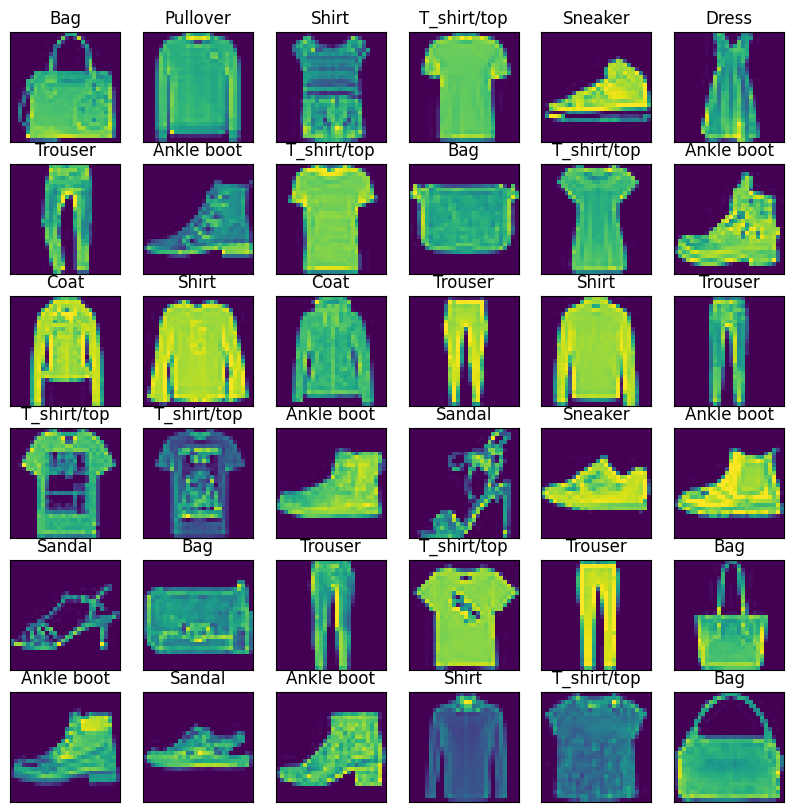

Epoch 1/75
12/12 [==============================] - 28s 2s/step - loss: 1.7326 - accuracy: 0.4569 - val_loss: 1.1093 - val_accuracy: 0.6864
Epoch 2/75
12/12 [==============================] - 26s 2s/step - loss: 0.8729 - accuracy: 0.7433 - val_loss: 0.6921 - val_accuracy: 0.7728
Epoch 3/75
12/12 [==============================] - 26s 2s/step - loss: 0.6315 - accuracy: 0.7857 - val_loss: 0.5735 - val_accuracy: 0.8014
Epoch 4/75
12/12 [==============================] - 33s 3s/step - loss: 0.5461 - accuracy: 0.8095 - val_loss: 0.5088 - val_accuracy: 0.8265
Epoch 5/75
12/12 [==============================] - 26s 2s/step - loss: 0.4916 - accuracy: 0.8318 - val_loss: 0.4714 - val_accuracy: 0.8422
Epoch 6/75
12/12 [==============================] - 27s 2s/step - loss: 0.4606 - accuracy: 0.8406 - val_loss: 0.4488 - val_accuracy: 0.8455
Epoch 7/75
12/12 [==============================] - 26s 2s/step - loss: 0.4363 - accuracy: 0.8491 - val_loss: 0.4254 - val_accuracy: 0.8560
Epoch 8/75
12/12 [==

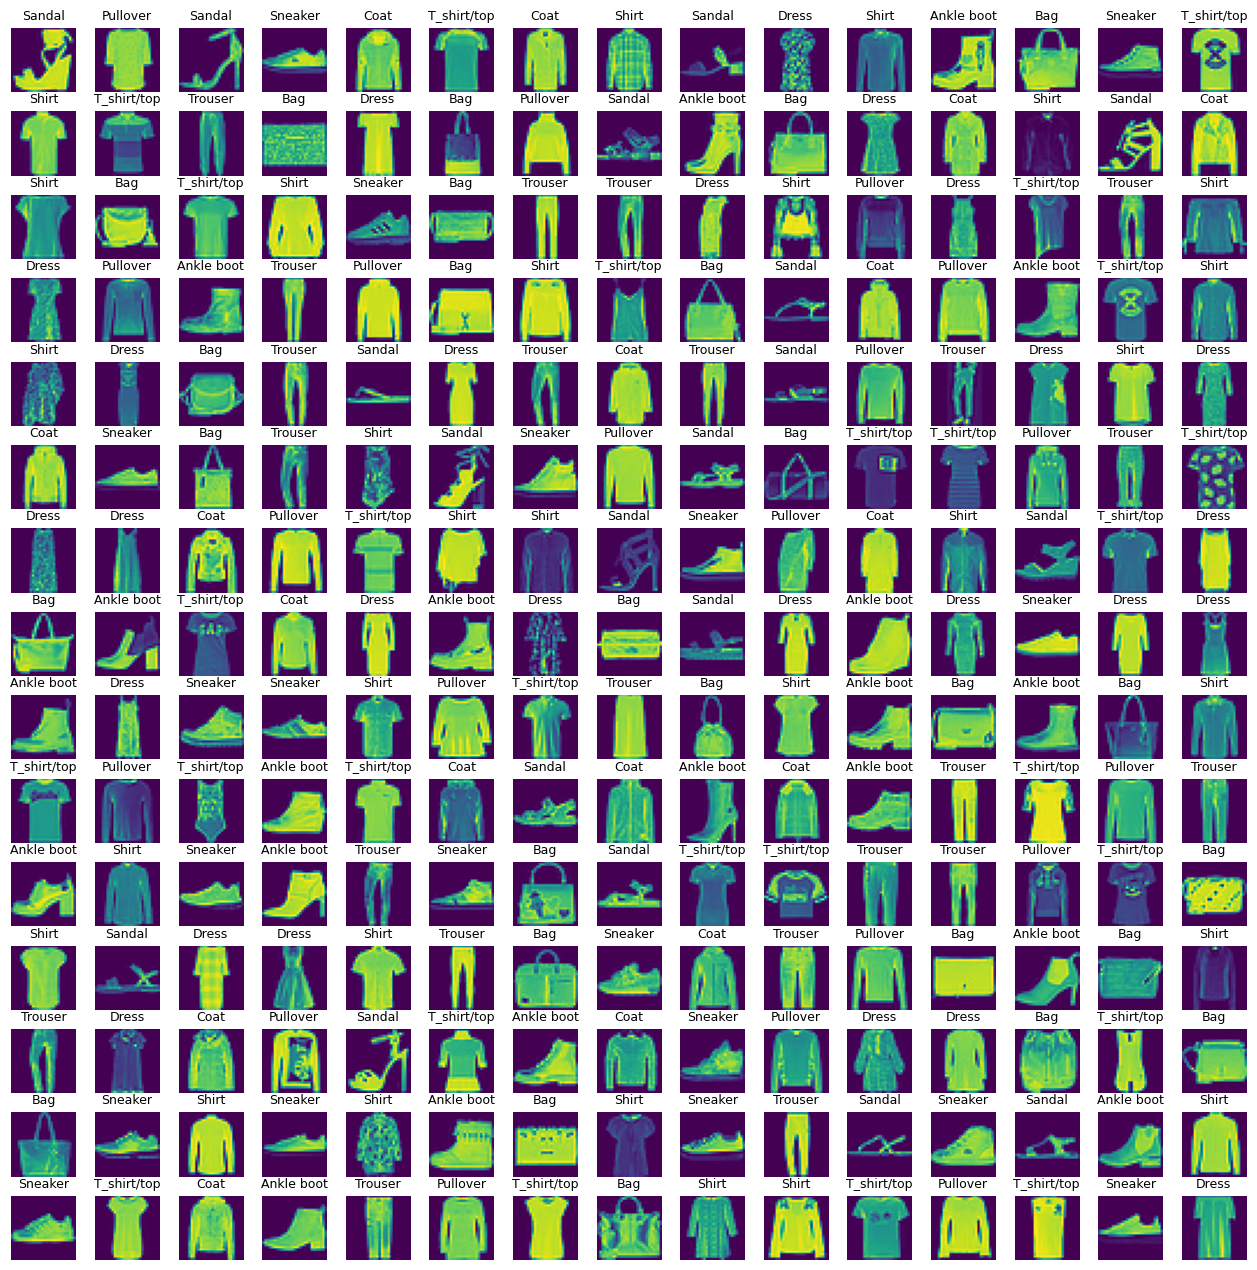

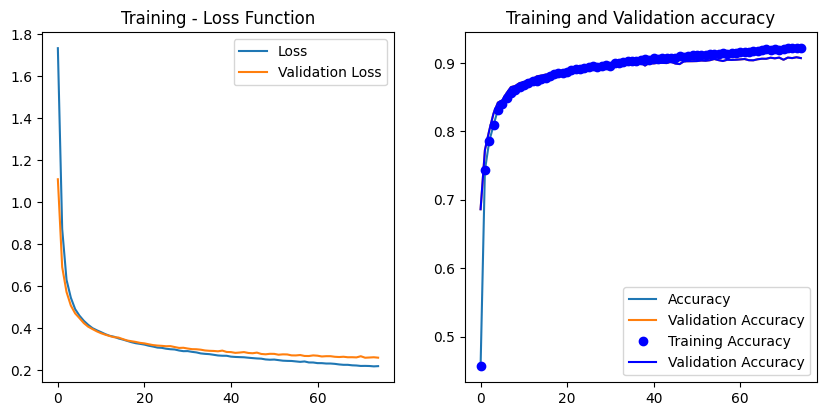

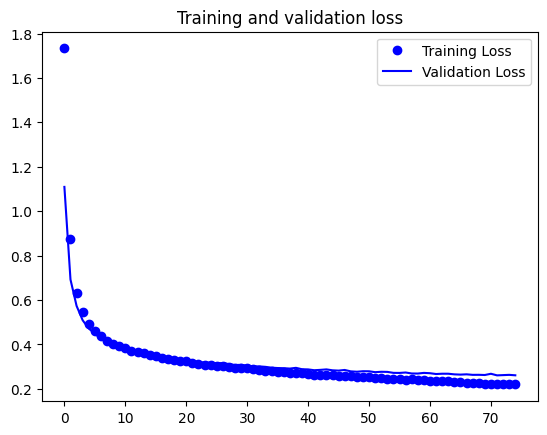

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

     Class 0       0.84      0.86      0.85      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.88      0.81      0.84      1000
     Class 3       0.89      0.91      0.90      1000
     Class 4       0.83      0.88      0.85      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.73      0.72      0.72      1000
     Class 7       0.94      0.97      0.95      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.97      0.95      0.96       999

    accuracy                           0.90      9999
   macro avg       0.90      0.90      0.90      9999
weighted avg       0.90      0.90      0.90      9999



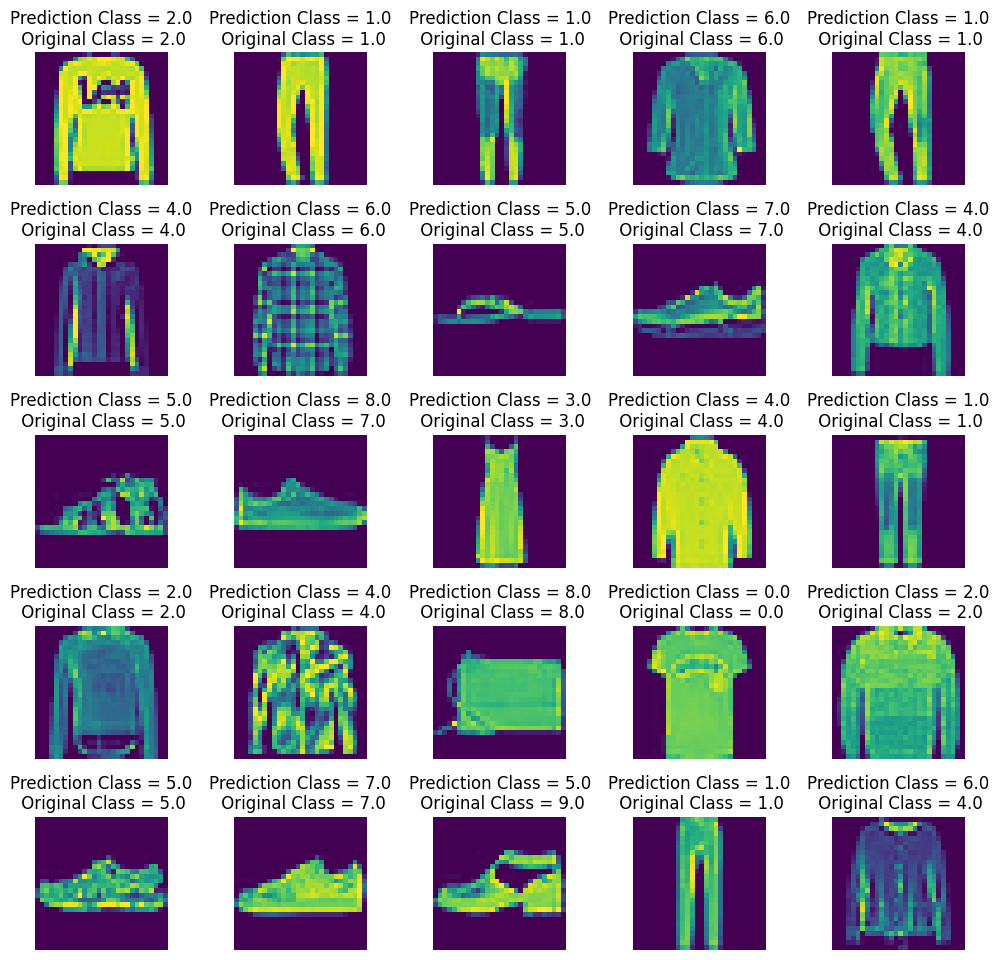

In [2]:
# -*- coding: utf-8 -*-

#from subprocess import check_output
#print(check_output(["ls", "C:\\data\\mnsit_fashion_data\\C:\data\mnsit_fashion_data.csv"]).decode("utf8"))
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

train_df = pd.read_csv('/content/drive/MyDrive/datasets/mnist_fashion_train.csv',
                       sep=',')
test_df = pd.read_csv('/content/drive/MyDrive/datasets/mnist_fashion_test.csv',
                      sep = ',')

# let us split the train data into x and y arrays where x represents the image
# data and y represents the labels.

# To do that we need to convert the dataframes into numpy arrays of float32 type
#  which is the acceptable form for tensorflow and keras.

train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

#Since the image data in x_train and x_test is from 0 to 255 ,
# we need to rescale this from 0 to 1.To do this we need to divide the x_train
# and x_test by 255 . It's important that the training set and the testing set
# be preprocessed in the same way:

x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

x_train,x_validate,y_train,y_validate = train_test_split(
    x_train,y_train,test_size = 0.2,random_state = 12345)


class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

#visualise the above 10 types of classes to get a feel of what these items
#look like

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

#First of all let us define the shape of the image before we define the model.
#Defined the shape of the image as 3d with rows and columns
#and 1 for the 3d visualisation

image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)



#******************Define the model******************#

# The first layer in model network, keras.layers.Flatten, transforms the format
# of the images from a two-dimensional array (of 28 by 28 pixels)
# to a one-dimensional array (of 28 * 28 = 784 pixels).
# This layer unstacks rows of pixels in the image and lining them up and
# has no parameters to learn; it only reformats the data.

# After the pixels are flattened, the network consists of a sequence of
# two keras.layers.Dense layers.
# These are densely connected, or fully connected, neural layers.
# The first Dense layer has 32 nodes (or neurons). The second (and last) layer
# is a 10-node softmax layer that returns an array of 10 probability scores
# that sum to 1. Each node contains a score that indicates the probability that
# the current image belongs to one of the 10 classes.

cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')

])

#*****************Compile the model***************#

# Before the model is ready for training, it needs a few more settings.
# These are added during the model's compile step:

# Loss function —This measures how accurate the model is during training.
# You want to minimize this function to "steer" the model in the right
# direction.Here we will use "sparse_categorical_crossentropy"
# Optimizer —This is how the model is updated based on the data it sees and
# its loss function. Metrics —Used to monitor the training and testing steps.
# The following example uses accuracy, the fraction of the images that are
# correctly classified.

cnn_model.compile(loss ='sparse_categorical_crossentropy',
                  optimizer=Adam(lr=0.001),metrics =['accuracy'])




#********************Train Model**************#
# Training the neural network model requires the following steps:

# Feed the training data to the model. In this example, the training data
# is in the x_train and y_train arrays.

# The model learns to associate images and labels.

# You ask the model to make predictions about a test set—in this example,
# the x_test array. Verify that the predictions match the labels
# from the y_test array.

# To start training, call the model.fit method—so called because it "fits"
# the model to the training data:


history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)


#Let us plot the Training Accuracy vs Loss to get a better
#understanding of the model training.

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')


score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))


import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Get the predictions for the test data
predicted_classes = cnn_model.predict(x_test)
predicted_classes=np.argmax(predicted_classes,axis=1)

#predicted_classes = (cnn_model.predict(x_test) > 0.5).astype("int32")

#predicted_classes = cnn_model.predict_classes(x_test)
#Get the indices to be plotted
y_true = np.array(test_df.iloc[:, 0])
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))


L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)














